In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm as tqdm
from glob import glob
from PIL import Image
import torch, torchvision

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Imagenet Transforms

In [3]:
imagenet_images = np.load('imagenet_sample.npy')
from_imagenet = False

In [4]:
imagenet_subset = imagenet_images[:100]

In [5]:
def reverse_imagenet_transforms(img_array):
    if torch.is_tensor(img_array):
        img_array = img_array.numpy()
    if len(img_array.shape) == 3:
        img_array = img_array.transpose((1,2,0))
    if len(img_array.shape) == 4:
        img_array = img_array.transpose((0,2,3,1))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_array = np.clip(std * img_array + mean, 0, 1)
    
    return(img_array)

In [6]:
def numpy_to_pil(img_array):
    img_dim = np.array(img_array.shape)
    if (img_dim[-1] not in (1,3)) & (len(img_dim) == 3):
        img_array = img_array.transpose(1,2,0)
    if (img_dim[-1] not in (1,3)) & (len(img_dim) == 4):
        img_array = img_array.transpose(0,2,3,1)
    if ((img_array >= 0) & (img_array <= 1)).all():
        img_array = img_array * 255
    if img_array.dtype != 'uint8':
        img_array = np.uint8(img_array)
    
    return (img_array)

In [7]:
if from_imagenet == True:
    imagenet_subset = reverse_imagenet_transforms(imagenet_subset)
imagenet_subset = numpy_to_pil(imagenet_subset)

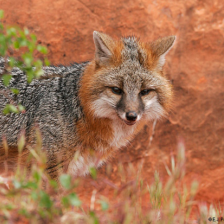

In [8]:
Image.fromarray(imagenet_subset[3])

In [10]:
array_list = []
for img_tensor in tqdm(imagenet_images):
    if from_imagenet == True:
        img_tensor = reverse_imagenet_transforms(img_tensor)
    array_list.append(numpy_to_pil(img_tensor))
imagenet_array = np.stack(array_list)

output_file = 'imagenet_sample.npy'
if not os.path.exists(output_file):
    np.save(output_file, imagenet_array)

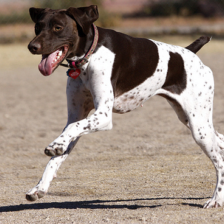

In [11]:
Image.fromarray(imagenet_array[np.random.randint(0,len(imagenet_images))])

### Random Image Array

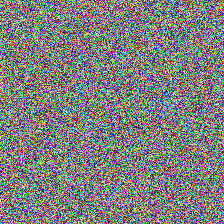

In [12]:
Image.fromarray(np.uint8(np.random.uniform(0, 255, (224, 224, 3))))

In [13]:
output_file = 'random_noise.npy'
if os.path.exists(output_file):
    random_noise = np.load(output_file)
    
if not os.path.exists('random_noise.npy'):
    noise_array_list = [np.uint8(np.random.uniform(0, 255, (224, 224, 3))) for i in range(1000)]
    noise_array = np.stack(noise_array_list, axis = 0)  
    np.save(output_file, noise_array)

In [ ]:
activity_df = pd.DataFrame(activity_dictlist)
activity_df.to_csv(os.path.join(output_dir,'{}.csv'.format(model_name)), index=None)